#ST


#DATA CLEANING

In [379]:
import pandas as pd

In [380]:
import pandas as pd
df1=pd.read_excel("/content/VAl1Sep22-1Sep23.xlsx")
df1=df1.drop_duplicates()
# duplicates should be dropped

In [381]:
df1=df1.drop_duplicates()

In [382]:
df1.shape
df1

,dt,values
0,2022-09-01 00:00:00,59.4
1,2022-09-01 01:00:00,148.4
2,2022-09-01 02:00:00,176.4
3,2022-09-01 03:00:00,171.6
4,2022-09-01 04:00:00,177.4
...,...,...
8730,2023-08-31 19:00:00,169.4
8731,2023-08-31 20:00:00,171.2
8732,2023-08-31 21:00:00,168.6
8733,2023-08-31 22:00:00,153.8


In [383]:
import pandas as pd
df2=pd.read_csv("/content/VAl20_21.csv")
df2=df2.drop_duplicates()
# duplicates should be dropped

In [384]:
df2=df2.drop_duplicates()

In [385]:
df2.shape
df2

,Date;value;measurement
0,31-12-2020 01:00;5.6;KWH
1,31-12-2020 02:00;4.8;KWH
2,31-12-2020 03:00;5.6;KWH
3,31-12-2020 04:00;7.2;KWH
4,31-12-2020 05:00;4.8;KWH
...,...
8779,31-12-2021 20:00;10.4;KWH
8780,31-12-2021 21:00;10.4;KWH
8781,31-12-2021 22:00;10;KWH
8782,31-12-2021 23:00;8.8;KWH


In [387]:
df2[['Date', 'Value', 'Measurement']] = df2['Date;value;measurement'].str.split(';', expand=True)

# Splitting the 'Date' column into 'Date' and 'Time'
df2[['Date', 'Time']] = df2['Date'].str.split(' ', expand=True)

# Extracting year and month
df2['Year'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y').dt.year
df2['Month'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y').dt.month
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')
# Extract day
df2['Day'] = df2['Date'].dt.day
df2[['Hour','Minutes']] = df2['Time'].str.split(':', expand=True)
df2

,Date;value;measurement,Date,Value,Measurement,Time,Year,Month,Day,Hour,Minutes
0,31-12-2020 01:00;5.6;KWH,2020-12-31,5.6,KWH,01:00,2020,12,31,01,00
1,31-12-2020 02:00;4.8;KWH,2020-12-31,4.8,KWH,02:00,2020,12,31,02,00
2,31-12-2020 03:00;5.6;KWH,2020-12-31,5.6,KWH,03:00,2020,12,31,03,00
3,31-12-2020 04:00;7.2;KWH,2020-12-31,7.2,KWH,04:00,2020,12,31,04,00
4,31-12-2020 05:00;4.8;KWH,2020-12-31,4.8,KWH,05:00,2020,12,31,05,00
...,...,...,...,...,...,...,...,...,...,...
8779,31-12-2021 20:00;10.4;KWH,2021-12-31,10.4,KWH,20:00,2021,12,31,20,00
8780,31-12-2021 21:00;10.4;KWH,2021-12-31,10.4,KWH,21:00,2021,12,31,21,00
8781,31-12-2021 22:00;10;KWH,2021-12-31,10,KWH,22:00,2021,12,31,22,00
8782,31-12-2021 23:00;8.8;KWH,2021-12-31,8.8,KWH,23:00,2021,12,31,23,00


In [390]:
df2=df2.drop(columns="Date;value;measurement")
df2=df2.drop(columns="Minutes")
df2=df2.drop(columns="Time")
df2=df2.drop(columns="Date")

In [391]:
KWH_count=(df2['Measurement']=='KWH').sum()
KWH_count
df2=df2.drop(columns="Measurement")

In [392]:
df2['Value'] = pd.to_numeric(df2['Value'])
df2['Value'] *= 1000
df2

,Value,Year,Month,Day,Hour
0,5600.0,2020,12,31,01
1,4800.0,2020,12,31,02
2,5600.0,2020,12,31,03
3,7200.0,2020,12,31,04
4,4800.0,2020,12,31,05
...,...,...,...,...,...
8779,10400.0,2021,12,31,20
8780,10400.0,2021,12,31,21
8781,10000.0,2021,12,31,22
8782,8800.0,2021,12,31,23


ADDING THE BOTH DATAFRAME

In [396]:
#Splitting the column
df1['year'] = df1['dt'].dt.year
df1['month'] = df1['dt'].dt.month
df1['day'] = df1['dt'].dt.day
df1['time'] = df1['dt'].dt.time
df1['minutes']=df1['dt'].dt.minute
df1['seconds']=df1['dt'].dt.second
df1['hours']=df1['dt'].dt.hour
zeros_minute_count=(df1['minutes']==0).sum()
print(zeros_minute_count)
zeros_second_count=(df1['seconds']==0).sum()
print(zeros_second_count)
zeros_hour_count=(df1['hours']==0).sum()
print(zeros_hour_count)
df1

KeyError: 'dt'

In [397]:
df1=df1.drop(columns="minutes")
df1=df1.drop(columns="seconds")
df1=df1.drop(columns="time")
df1=df1.drop(columns="dt")
df2=df2.rename(columns={'Value' :'values' })
df2=df2.rename(columns={'Year' :'year' })
df2=df2.rename(columns={'Month' :'month' })
df2=df2.rename(columns={'Day' :'day' })
df2=df2.rename(columns={'Hour' :'hours' })
df1
df1=df1.rename(columns={'Values' :'values' })
df1['values']=df1['values']*1000

KeyError: "['minutes'] not found in axis"

In [ ]:
df2

In [ ]:
df = pd.concat([df2, df1])
df

# PER DAY ANALYSIS

In [398]:
Hourly_average_consumption = df.groupby(['year', 'month', 'day'])['values'].mean()
Hourly_average_consumption_df = Hourly_average_consumption.reset_index()
Hourly_average_consumption_df = Hourly_average_consumption_df.rename(columns={'values': 'Hourly_average_consumption'})
Hourly_average_consumption_df

,year,month,day,Hourly_average_consumption
0,2021,12,21,24252.608696
1,2021,12,22,23551.500000
2,2021,12,23,22725.166667
3,2021,12,24,21543.500000
4,2021,12,25,21284.916667
...,...,...,...,...
371,2023,8,27,108833.333333
372,2023,8,28,128366.666667
373,2023,8,29,117008.333333
374,2023,8,30,116250.000000


In [399]:
Hourly_maximum_consumption= df.groupby(['year','month','day'])['values'].max()
Hourly_maximum_consumption_df=Hourly_maximum_consumption.reset_index()
Hourly_maximum_consumption_df=Hourly_maximum_consumption_df.rename(columns={'values' :'Hourly_maximum_consumption' })
Hourly_maximum_consumption_df

,year,month,day,Hourly_maximum_consumption
0,2021,12,21,27818.0
1,2021,12,22,27594.0
2,2021,12,23,25158.0
3,2021,12,24,24160.0
4,2021,12,25,22056.0
...,...,...,...,...
371,2023,8,27,407000.0
372,2023,8,28,331000.0
373,2023,8,29,313600.0
374,2023,8,30,273200.0


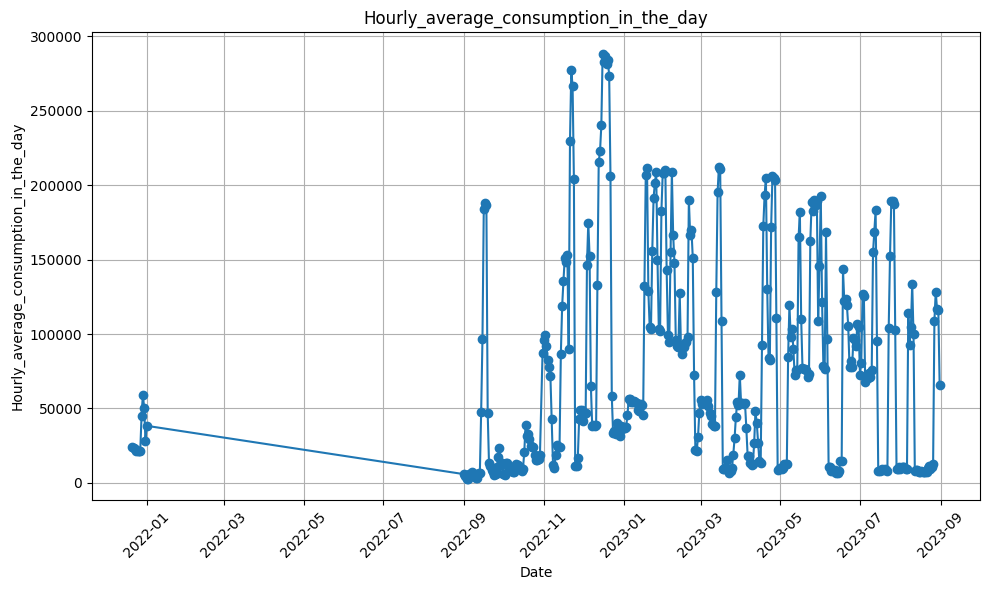

In [400]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_average_consumption_df['date'] = pd.to_datetime(Hourly_average_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_average_consumption_df['date'], Hourly_average_consumption_df['Hourly_average_consumption'], marker='o', linestyle='-')
plt.title('Hourly_average_consumption_in_the_day')
plt.xlabel('Date')
plt.ylabel('Hourly_average_consumption_in_the_day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

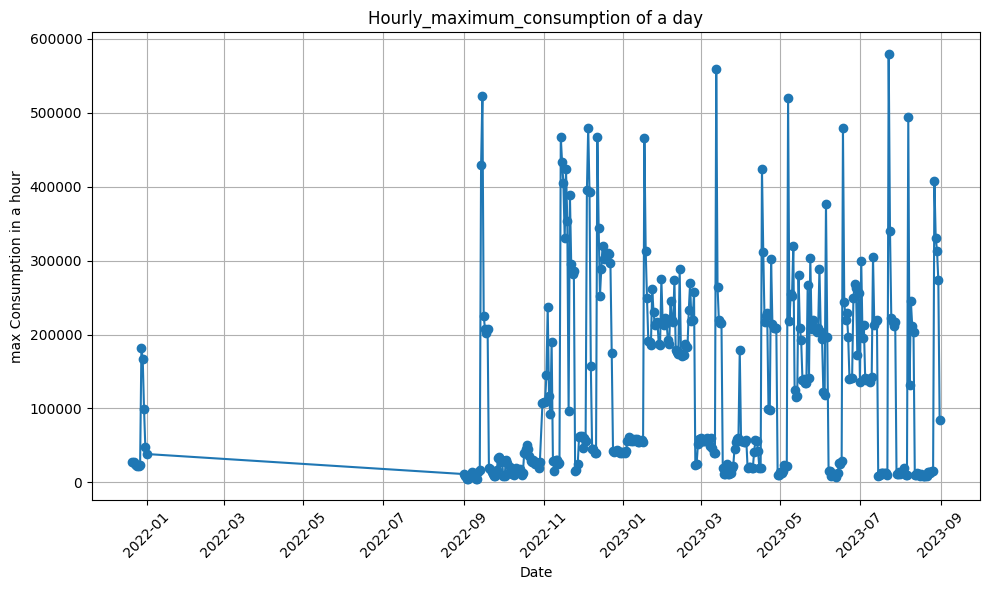

In [401]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_maximum_consumption_df['date'] = pd.to_datetime(Hourly_maximum_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_maximum_consumption_df['date'], Hourly_maximum_consumption_df['Hourly_maximum_consumption'], marker='o', linestyle='-')
plt.title('Hourly_maximum_consumption of a day')
plt.xlabel('Date')
plt.ylabel('max Consumption in a hour')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [402]:
daily_sum= df.groupby(['year','month','day'])['values'].sum()
daily_sum_df=daily_sum.reset_index()
daily_sum_df=daily_sum_df.rename(columns={'values' :'total of the day' })
daily_sum_df

,year,month,day,total of the day
0,2021,12,21,557810.0
1,2021,12,22,565236.0
2,2021,12,23,545404.0
3,2021,12,24,517044.0
4,2021,12,25,510838.0
...,...,...,...,...
371,2023,8,27,2612000.0
372,2023,8,28,3080800.0
373,2023,8,29,2808200.0
374,2023,8,30,2790000.0


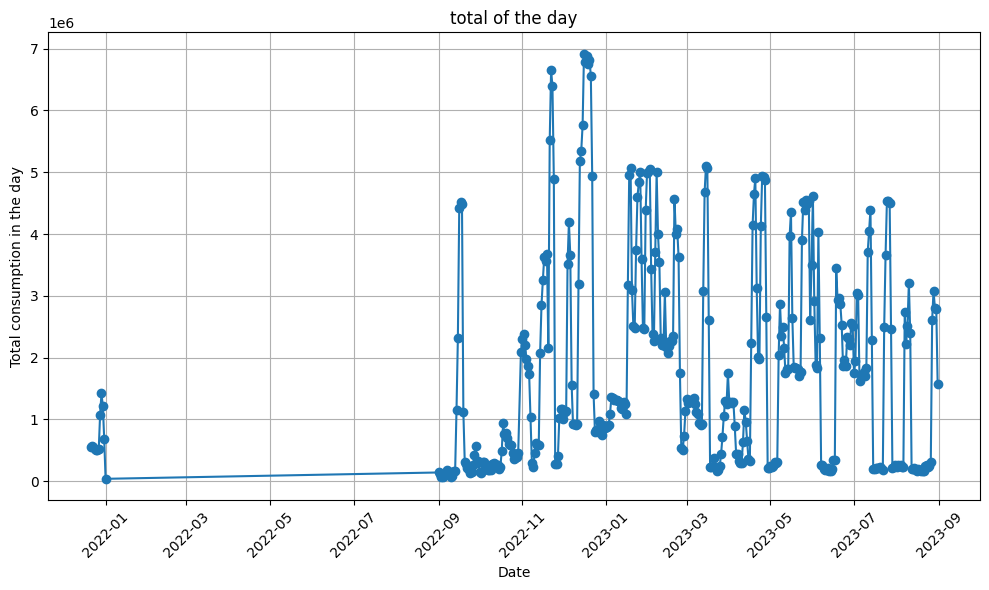

In [403]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
daily_sum_df['date'] = pd.to_datetime(daily_sum_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_sum_df['date'], daily_sum_df['total of the day'], marker='o', linestyle='-')
plt.title('total of the day')
plt.xlabel('Date')
plt.ylabel('Total consumption in the day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#PER MONTH ANALYSIS

In [404]:
Daily_average_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].mean()
Daily_average_consumption_df=Daily_average_consumption.reset_index()
Daily_average_consumption_df=Daily_average_consumption_df.rename(columns={'total of the day':'Daily_average_consumption'})
Daily_average_consumption_df

,year,month,Daily_average_consumption
0,2021,12,7.374067e+05
1,2022,1,3.834400e+04
2,2022,9,7.566867e+05
3,2022,10,4.422867e+05
4,2022,11,2.175060e+06
5,2022,12,3.006587e+06
6,2023,1,2.462045e+06
7,2023,2,2.800429e+06
8,2023,3,1.385671e+06
9,2023,4,1.895100e+06


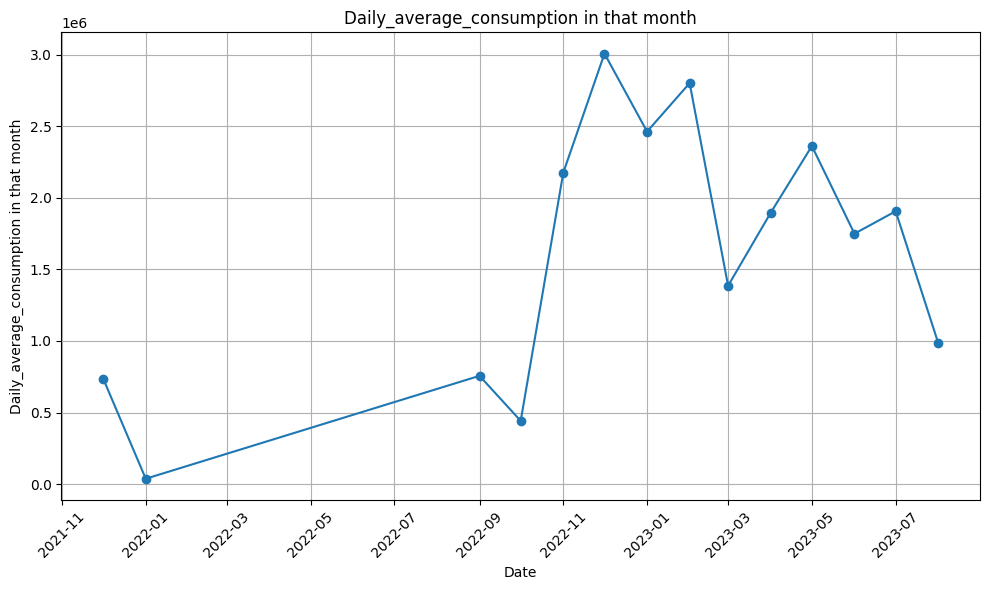

In [405]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_average_consumption_df['date'] = pd.to_datetime({'year': Daily_average_consumption_df['year'], 'month': Daily_average_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_average_consumption_df['date'], Daily_average_consumption_df['Daily_average_consumption'], marker='o', linestyle='-')
plt.title('Daily_average_consumption in that month')
plt.xlabel('Date')
plt.ylabel('Daily_average_consumption in that month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [406]:
monthly_total = daily_sum_df.groupby(['year', 'month'])['total of the day'].sum()
monthly_total_df=monthly_total.reset_index()
monthly_total_df=monthly_total_df.rename(columns={'total of the day':'monthly_total'})
monthly_total_df

,year,month,monthly_total
0,2021,12,8111474.0
1,2022,1,38344.0
2,2022,9,22700600.0
3,2022,10,13268600.0
4,2022,11,65251800.0
5,2022,12,93204200.0
6,2023,1,76323400.0
7,2023,2,78412000.0
8,2023,3,42955800.0
9,2023,4,56853000.0


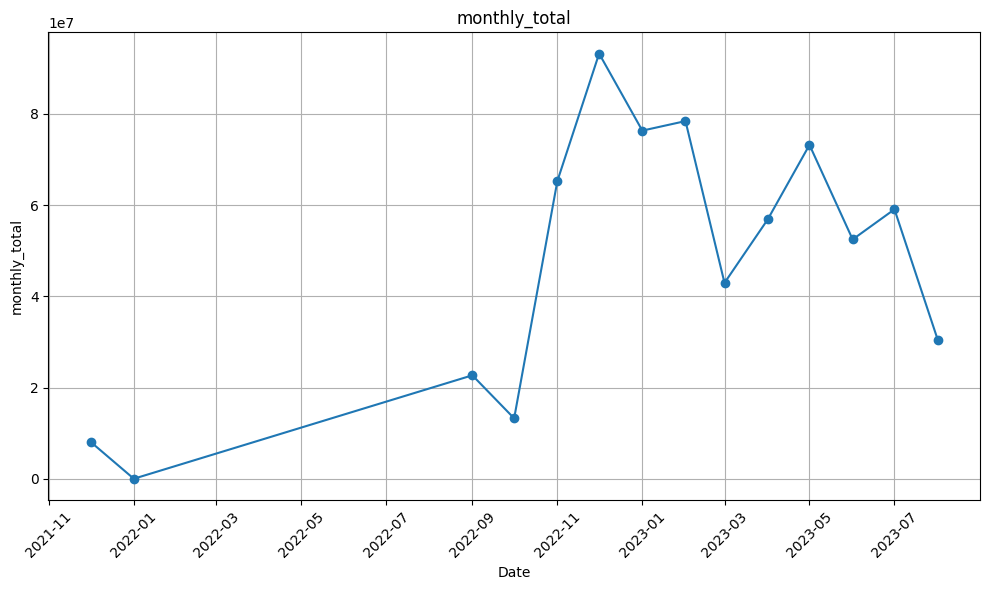

In [407]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
monthly_total_df['date'] = pd.to_datetime({'year': monthly_total_df['year'], 'month': monthly_total_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_df['date'], monthly_total_df['monthly_total'], marker='o', linestyle='-')
plt.title('monthly_total')
plt.xlabel('Date')
plt.ylabel('monthly_total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [408]:
Daily_maximum_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].max()
Daily_maximum_consumption_df=Daily_maximum_consumption.reset_index()
Daily_maximum_consumption_df=Daily_maximum_consumption_df.rename(columns={'total of the day':'maximum in any day'})
Daily_maximum_consumption_df

,year,month,maximum in any day
0,2021,12,1419438.0
1,2022,1,38344.0
2,2022,9,4518000.0
3,2022,10,2092600.0
4,2022,11,6648000.0
5,2022,12,6919400.0
6,2023,1,5072400.0
7,2023,2,5047000.0
8,2023,3,5097000.0
9,2023,4,4941600.0


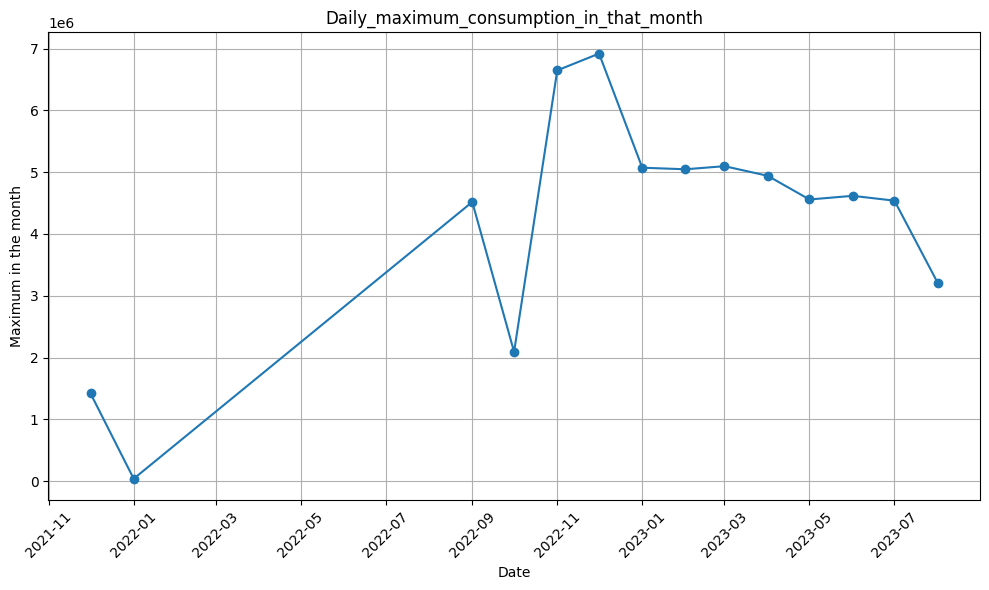

In [409]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_maximum_consumption_df['date'] = pd.to_datetime({'year': Daily_maximum_consumption_df['year'], 'month': Daily_maximum_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_maximum_consumption_df['date'], Daily_maximum_consumption_df['maximum in any day'], marker='o', linestyle='-')
plt.title('Daily_maximum_consumption_in_that_month')
plt.xlabel('Date')
plt.ylabel('Maximum in the month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yearly anaysis

In [375]:
Monthly_average_consumption = monthly_total_df.groupby(['year'])['monthly_total'].mean()

In [376]:
Monthly_average_consumption

year
2021     8111474.0
2022    38892708.8
2023    58730750.0
Name: monthly_total, dtype: float64

In [377]:
mean_daily_consumption = daily_sum_df['total of the day'].mean()
print(mean_daily_consumption)

1788353.7712765958


In [378]:
mean_monthly_consumption=monthly_total_df['monthly_total'].mean()
print(mean_monthly_consumption)

48030072.71428572
